# Iudin Artyom BVT2101

In [94]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/kaggle/input/titanic/train.csv", index_col="PassengerId")
df.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,7.2250,NaN,C
308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S
624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# 1. Man/Woman

In [13]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

- Female - 314
- Male - 577

# 2. Pclass distribution

In [15]:
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


108 man in 2 PClass

# 3. Median and Deviation of Fare

In [32]:
print(f"Fare's median = {df.Fare.median():.2f}, and deviation = {df.Fare.std():.2f}")

Fare's median = 14.45, and deviation = 49.69


# 4. Middle age vs old one

In [48]:
survived = df[df.Survived == 1]

if (len(survived[survived.Age < 30]) / len(survived)) > (len(survived[survived.Age > 60]) / len(survived)):
    print("Yes, it was true that people younger than 30 had more chances to survive")
else:
    print("No, it was a myth")
    
print(f"For younger than 30 = {len(survived[survived.Age < 30]) / len(survived):.2f}")
print(f"For older than 60 = {len(survived[survived.Age > 60]) / len(survived):.2f}")

Yes, it was true that people younger than 30 had more chances to survive
For younger than 30 = 0.46
For older than 60 = 0.01


# 5. Woman vs Man

In [53]:
if df.groupby('Sex').Survived.mean()['female'] > df.groupby('Sex').Survived.mean()['male']:
    print("It was true")
else:
    print("It was a myth")
    
print(f"Female chances = {df.groupby('Sex').Survived.mean()['female']:.2f}, male chances = {df.groupby('Sex').Survived.mean()['male']:.2f}")

It was true
Female chances = 0.74, male chances = 0.19


# 6. Most popular male name

In [57]:
print(f"Most popular male name = {df[df['Sex'] == 'male'].Name.mode()[0]}")

Most popular male name = Abbing, Mr. Anthony


# 7. Fare and Age distribution

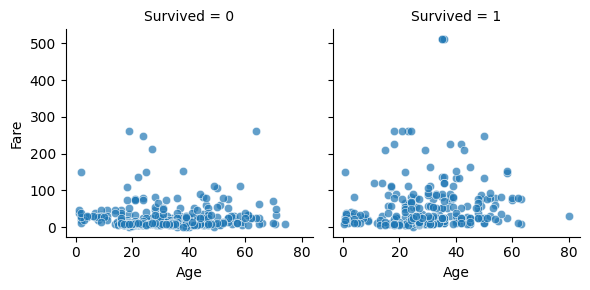

In [111]:
import seaborn as sns

g = sns.FacetGrid(df, col="Survived")
g.map(sns.scatterplot, "Age", "Fare", alpha=0.7)

It's a rich man's world

# 8.

In [98]:
df.groupby(['Sex', 'Pclass']).Age.mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

- Yes, mean male age for the 1 Class is more than 40
- No, mean male age for the 1 Class is less than 40
- Yes in all classes men older than women
- Yes less class number - more age